#Neural Networks Project - 2

## Project Objective

The objective of the project is to learn how to implement a simple image classification pipeline based on the k-Nearest Neighbour and a deep neural network. The goals of this assignment are as follows:


1.   Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
2.   Data fetching and understand the train/val/test splits.
3.   Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)
4.   Print the classification metric report (2.5 points)
5.   Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)
6.   Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)
7.   Implement batch normalization for training the neural network (2.5 points)
8.   Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)





**Step 1:** The SVHN data source (SVHN_single_grey1.h5) has been shared to us and is available on Google Drive. Lets establish connection with Google Drive

In [0]:
import os
import pandas as pd

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import h5py

In [0]:
filename='/content/drive/My Drive/Neural Networks/SVHN_single_grey1.h5'

with h5py.File(filename,'r') as f:
  X_test=f["X_test"][:]
  X_train=f["X_train"][:]
  y_test=f["y_test"][:]
  y_train=f["y_train"][:]
  X_val=f["X_val"][:]
  y_val=f["y_val"][:]

In [0]:
import numpy as np
import matplotlib.pyplot as plt


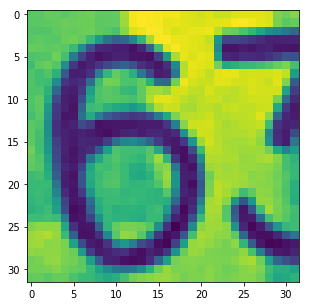

In [34]:
plt.imshow(X_train[1])

In [35]:
#Print shape of train and test datasets
print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)
# print the unique numbers in y
print(np.unique(y_train))

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)
[0 1 2 3 4 5 6 7 8 9]


###Observation: Training dataset has 42000 images of pixel size 32 x 32 and the testing dataset consists of 18000 images of pixel size 32 x 32.

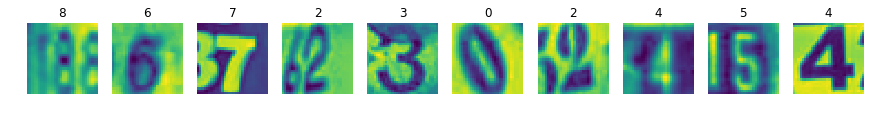

In [7]:
# Plot some train data with labels 

plt.rcParams['figure.figsize'] = (15.0, 15.0)
f, ax = plt.subplots(nrows=1, ncols=10)

for i, j in enumerate(np.random.randint(0, X_train.shape[0], size=10)):
    ax[i].axis('off')
    ax[i].set_title(y_train[j], loc='center')
    ax[i].imshow(X_train[j,:,:])

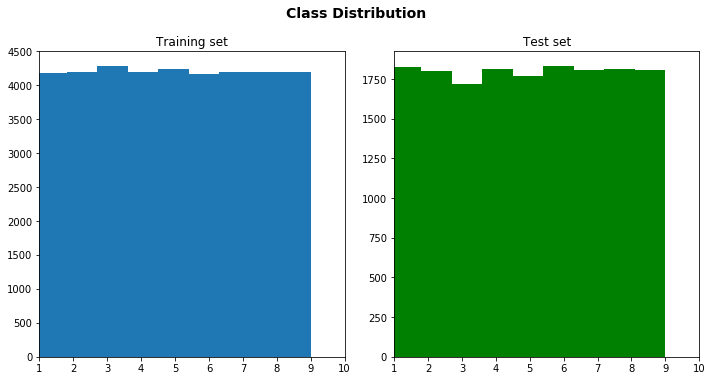

In [11]:
# plotting the distribution of the data in the train and test set


plt.rcParams['figure.figsize'] = (10.0, 5.0)
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test set")

fig.tight_layout()

###Observation: From the plotting we can observe that the dataset is evenly distributed.

## Approach 1: Using K-Nearest Neighbor (KNN) classifier

*   The current dataset shape is three dimension & shall not compile when passed to ML algorithms. 
*   KNN always expects a two dimensional data. So, we will need to reshape data.
*   We will need to flatten the three dimensional data into two dimensional data. 
*   3D -> (number_of_samples, nx, ny ): The number of samples shall be maintained whereas The nx and ny components can be multiplied and kept as the second dimension.
*   3D --> (number_of_samples, nx, ny ) need to be flattened to 2D --> (number_of_samples, nx*ny)

In [0]:
nsamples, nx, ny = X_train.shape
n1samples,n1x,n1y = X_test.shape
n2samples,n2x,n2y = X_val.shape

print(nsamples, nx, ny)
print(n1samples,n1x,n1y)
print(n2samples,n2x,n2y)

42000 32 32
18000 32 32
60000 32 32


In [0]:
X_train_new = X_train.reshape((nsamples,nx*ny))
X_test_new = X_test.reshape((n1samples,n1x*n1y))
X_val_new = X_val.reshape((n2samples,n2x*n2y))

print(X_train_new.shape)
print(X_test_new.shape)
print(X_val_new.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 1024)
(18000, 1024)
(60000, 1024)
(42000,)
(18000,)


In [0]:
import sklearn
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

### Optimum way to calculate the K value is mentioned below:
*   Optimum K =  sqrt(N)/2 where N is the number of samples.
*   Here we have 42000 samples and hence K = sqrt(42000)/2 = 103

In [0]:
kVals = range(1, 30, 2)
accuracies = []
 
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in range(1, 30, 2):
	# train the k-Nearest Neighbor classifier with the current value of `k`
	model = KNeighborsClassifier(n_neighbors=k)
	model.fit(X_train_new, y_train)
 
	# evaluate the model and update the accuracies list
	score = model.score(X_test_new, y_test)
	print("k=%d, accuracy=%.2f%%" % (k, score * 100))
	accuracies.append(score)
 
# find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
	accuracies[i] * 100))  


k=1, accuracy=45.92%
k=3, accuracy=46.18%
k=5, accuracy=49.02%
k=7, accuracy=50.71%
k=9, accuracy=51.24%
k=11, accuracy=51.80%
k=13, accuracy=52.11%
k=15, accuracy=52.36%
k=17, accuracy=52.87%
k=19, accuracy=52.72%
k=21, accuracy=52.91%
k=23, accuracy=52.98%
k=25, accuracy=52.97%
k=27, accuracy=53.23%
k=29, accuracy=53.16%
k=27 achieved highest accuracy of 53.23% on validation data


In [0]:
# re-train our classifier using the best k=27 and predict the labels of the
# test data
model = KNeighborsClassifier(n_neighbors=27)
model.fit(X_train_new,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

In [0]:
predictions = model.predict(X_test_new)
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.46      0.71      0.56      1814
           1       0.46      0.73      0.56      1828
           2       0.64      0.54      0.58      1803
           3       0.47      0.43      0.45      1719
           4       0.64      0.65      0.65      1812
           5       0.53      0.40      0.45      1768
           6       0.51      0.41      0.46      1832
           7       0.71      0.62      0.66      1808
           8       0.47      0.37      0.41      1812
           9       0.55      0.44      0.49      1804

    accuracy                           0.53     18000
   macro avg       0.54      0.53      0.53     18000
weighted avg       0.54      0.53      0.53     18000



In [0]:
#Confusion matrix

print(confusion_matrix(y_test,predictions))

[[1289   60   31   44   51   29   94   39   70  107]
 [  96 1337   54   82   80   34   33   51   32   29]
 [  90  249  971   92   48   45   30  146   45   87]
 [ 121  267  118  742   57  165   38   53   93   65]
 [ 102  253   32   53 1183   21   51   23   39   55]
 [ 144  164   49  244   78  707  141   35  121   85]
 [ 310  127   31   62  143  127  755   23  208   46]
 [ 101  197  115   79   43   29   39 1130   26   49]
 [ 255  134   60  107  101   94  246   28  666  121]
 [ 321  146   61   82   65   92   54   74  108  801]]


## Approach 2 - Using Deep Neural Network (DNN) Classifier

In [0]:
import tensorflow as tf
tf.enable_eager_execution()
tf.set_random_seed(1)


In [0]:
train_Y = tf.keras.utils.to_categorical(y_train, num_classes=10)
test_Y = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [0]:
val_Y = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Hidden layers
model.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))

#Dropout layer
model.add(tf.keras.layers.Dropout(0.5))

#Hidden layers
model.add(tf.keras.layers.Dense(60, activation='relu', name='Layer_3'))
model.add(tf.keras.layers.Dense(30, activation='relu', name='Layer_4'))

#Dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [0]:
#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
#Train the model
model.fit(X_train,train_Y,          
          validation_data=(X_test,test_Y),
          epochs=20,
          batch_size=30)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 7s 175us/sample - loss: 2.2665 - acc: 0.1298 - val_loss: 2.0283 - val_acc: 0.2539
Epoch 2/20
42000/42000 [==============================] - 7s 162us/sample - loss: 2.0253 - acc: 0.2355 - val_loss: 1.7322 - val_acc: 0.3772
Epoch 3/20
42000/42000 [==============================] - 7s 162us/sample - loss: 1.7774 - acc: 0.3505 - val_loss: 1.3111 - val_acc: 0.5459
Epoch 4/20
42000/42000 [==============================] - 7s 163us/sample - loss: 1.4959 - acc: 0.4724 - val_loss: 1.1118 - val_acc: 0.6423
Epoch 5/20
42000/42000 [==============================] - 7s 161us/sample - loss: 1.3344 - acc: 0.5390 - val_loss: 0.9843 - val_acc: 0.6933
Epoch 6/20
42000/42000 [==============================] - 7s 161us/sample - loss: 1.2313 - acc: 0.5876 - val_loss: 0.9006 - val_acc: 0.7234
Epoch 7/20
42000/42000 [==============================] - 7s 163us/sample - loss: 1.1398 - acc: 0.6322 - val_l

In [0]:
model.save('svhn_dnn_vx.h5')

In [0]:
prediction = model.predict(X_test)

In [0]:
count = 0
yP = prediction
while count<3000:
    yP[count][0] = np.argmax(prediction[count])
    count = count+1

In [49]:
print(model.evaluate(X_test,test_Y))

18000/18000 [==============================] - 1s 66us/sample - loss: 0.5776 - acc: 0.8283
[0.577646105448405, 0.8283333]


In [50]:

cm1=confusion_matrix(test_Y.argmax(axis=1), yP.argmax(axis=1))
print(cm1)

[[1380   45    9    7   18    6  186   30    8  125]
 [ 321 1357    4   11   18   10   14   67   20    6]
 [ 308   37 1248   20   17   10    4  111   18   30]
 [ 288   58   17 1058   18  152   11   63   34   20]
 [ 319   77   25   10 1273   19   26   19   12   32]
 [ 327   20    8   44   14 1246   50   20   21   18]
 [ 348   33    9   18   23   79 1258   10   44   10]
 [ 312   78   37   13   11   13    2 1328    7    7]
 [ 339   55   25   39   19   68  109   16 1106   36]
 [ 357   43   23   23   15   56   10   40   27 1210]]


In [51]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(testY.argmax(axis=1), yP.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.32      0.76      0.45      1814
     class 1       0.75      0.74      0.75      1828
     class 2       0.89      0.69      0.78      1803
     class 3       0.85      0.62      0.71      1719
     class 4       0.89      0.70      0.79      1812
     class 5       0.75      0.70      0.73      1768
     class 6       0.75      0.69      0.72      1832
     class 7       0.78      0.73      0.76      1808
     class 8       0.85      0.61      0.71      1812
     class 9       0.81      0.67      0.73      1804

    accuracy                           0.69     18000
   macro avg       0.77      0.69      0.71     18000
weighted avg       0.76      0.69      0.71     18000

